### HW5    Оксана Рудковская,   Оценка стоимости недвижимости

Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)
Построить случайный лес, вывести важность признаков
Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [5]:
for col in categorical_feats:
    data[col].fillna('None',inplace=True) # Заполняем пустые данные в категориальных признаках

In [6]:
data.fillna(data.mean(), inplace=True) # Заполняем средним числом пустые данные в числовых данных

In [7]:
df_num_corr = data[numerical_feats].corr()['SalePrice'][:-1]
df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) 
# Смотрим на корреляцию числовых признаков относительно цены (выделили > 0.5)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [8]:
num_strong_corr = ['OverallQual', 'GrLivArea', 'GarageCars', 
                   'GarageArea','TotalBsmtSF', '1stFlrSF', 
                   'FullBath', 'TotRmsAbvGrd','YearBuilt', 'YearRemodAdd'] # Признаки с сильной корреляцией

In [9]:
to_drop_num = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
           'OverallCond', 'BsmtFinSF1',
           'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
           'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
           'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'GarageYrBlt', 'MasVnrArea','Fireplaces'] 
# Признаки со слабой корреляцией

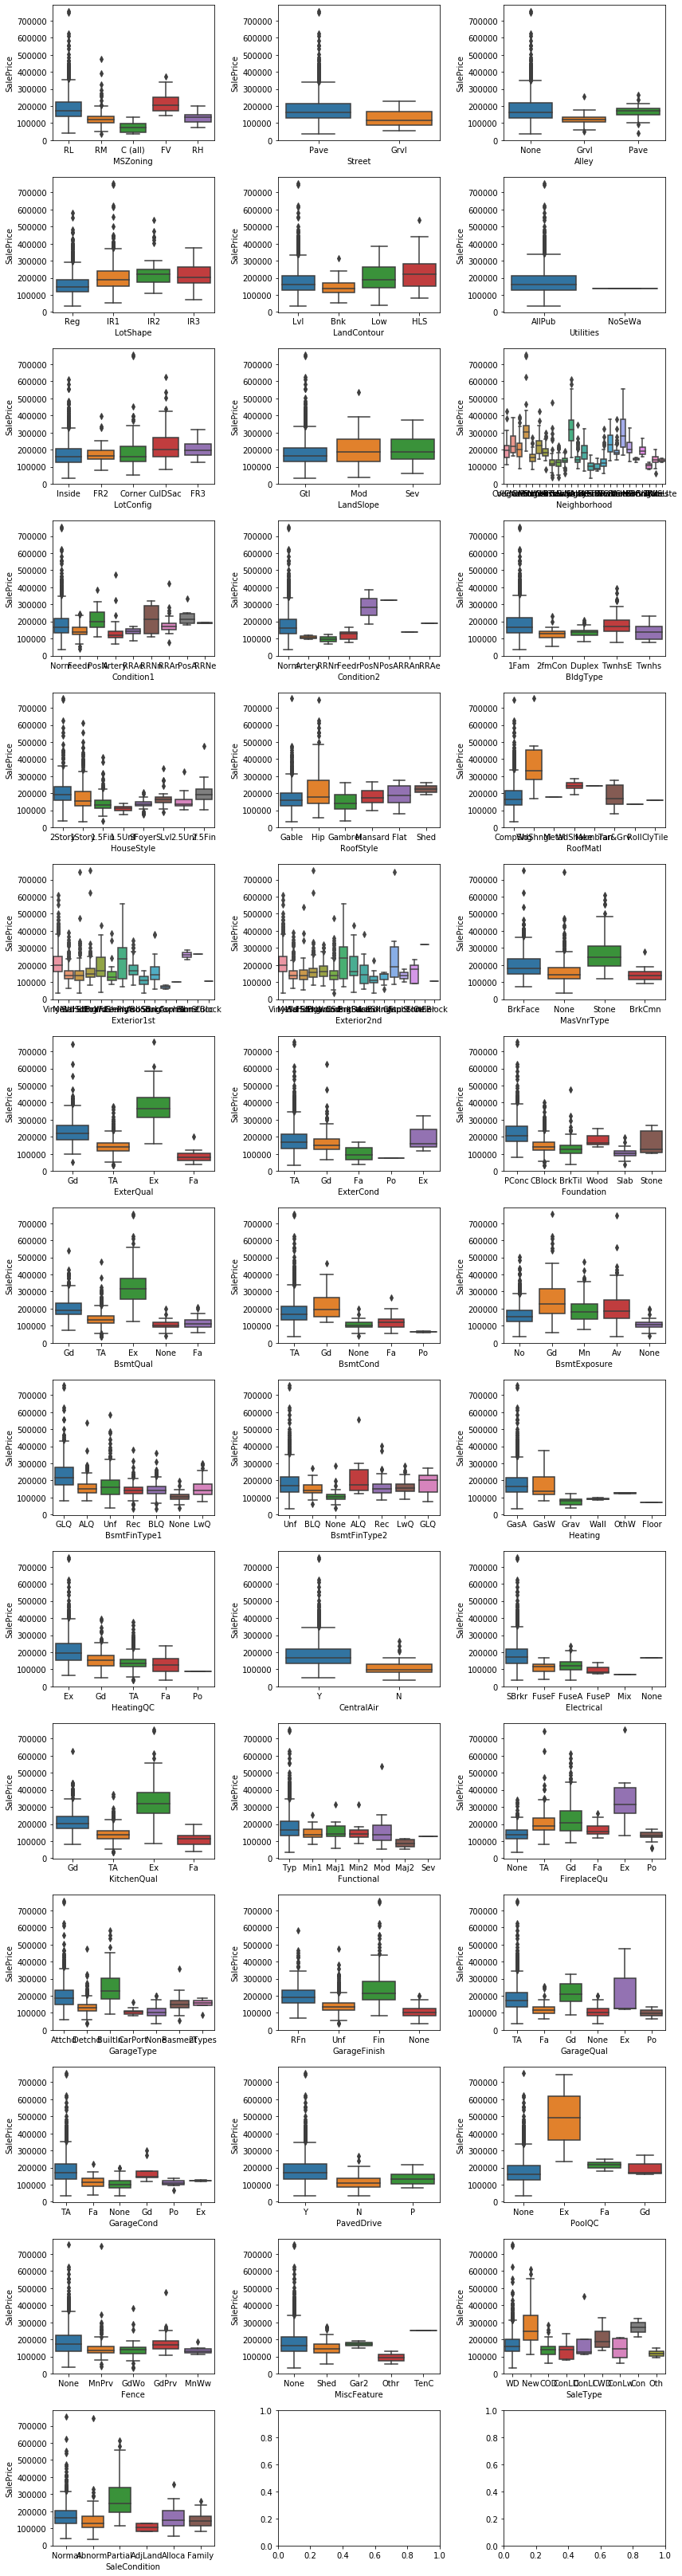

In [10]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=data["SalePrice"], data=data, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() # Посмотрим на боксплоты категориальных признаков относительно цены и выделим признаки с имеющейся корреляцией 

In [11]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'] 
# Выбрали признаки, где можно увидеть корреляцию

to_drop_catg = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ] # Признаки со слабой корреляцией

In [12]:
y = data['SalePrice']
cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 
data.drop(cols_to_drop, inplace= True, axis = 1) # Удаляем из датафрейма не интересные нам столбцы

In [13]:
# Создаем дамми-переменные для категорий
dummy_data = pd.get_dummies(data, columns=list(catg_strong_corr))

In [14]:
dummy_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,0,0,0,0,1
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,0,0,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,0,0,0,0,1
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,0,0,0,0,0,0,0,0,1
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy_data, y, test_size = 0.2)
# разбиваем выборку

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train.loc[:,num_strong_corr] = sc.fit_transform(X_train[num_strong_corr])
X_test.loc[:,num_strong_corr] = sc.transform(X_test[num_strong_corr])

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Случайный лес

In [17]:
from sklearn.ensemble import RandomForestRegressor


reg_rf = RandomForestRegressor(n_estimators=10, max_depth=9, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
reg_rf.fit(X_train, y_train)   


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
reg_rf.score(X_test,y_test)

0.8618544037579282

# Важность признаков

Ellipsis

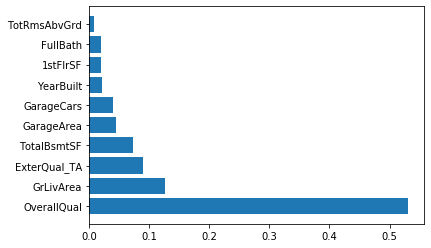

In [19]:
fi = pd.DataFrame(zip(reg_rf.feature_importances_, X_train.columns)).sort_values([0], ascending=False).head(10)
plt.barh(np.arange(len(fi[0])), fi[0])
plt.yticks(np.arange(len(fi[1])),fi[1])
...

Самым важным признаком является  OverallQual - оценка дома с точки зрения материалов и отделки

# Стекинг

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [21]:
reg = StackingRegressor(
     [('lr', LinearRegression()),
#     ('svr', LinearSVR(random_state=0)),
      ('tree', DecisionTreeRegressor(max_depth= 8, max_features= 14, max_leaf_nodes= None, min_samples_split= 20, presort= False, random_state= 5))
    ],
RandomForestRegressor(n_estimators=10,
                                           max_depth=9, min_samples_leaf=20, max_features=1, n_jobs=-1))
#Подкапотные алгоритмы - линейная регрессия и деревья решений, финальный алгоритм - случайный лес

In [22]:
reg.fit(X_train, y_train)

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The pa

StackingRegressor(cv=None,
                  estimators=[('lr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('tree',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=20,
                                                     min_weight_fraction_leaf=0.0,

In [23]:
reg.score(X_test,y_test)

0.8756505254666314

Качество стекинга чуть получше случайного леса

In [24]:
reg.final_estimator_.feature_importances_

array([0.44607574, 0.55392426])

Ellipsis

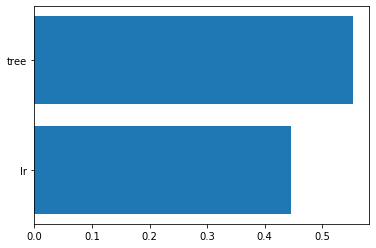

In [25]:
fi = pd.DataFrame(zip(reg.final_estimator_.feature_importances_, reg.named_estimators_.keys())).sort_values([0])
plt.barh(np.arange(len(fi[0])), fi[0])
plt.yticks(np.arange(len(fi[1])),fi[1])
...